<a href="https://colab.research.google.com/github/ekselan/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Copy_of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# Import tools

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data


--2020-03-17 19:30:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-03-17 19:30:50 (614 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
# Import and clean the data

df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

print(df.shape)
df.head()

In [4]:
df = df.replace({'y':1, 'n':0, '?':np.NaN})

df.head()

# Change y/n values to integers, replace the ?s with NaN values

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

# Split dataset into two subsets by party

## 1. Generate and numerically represent a confidence interval

In [0]:
ds = dem['budget']
# Define sample

In [0]:
ds = ds.dropna()
# Get rid of NaN values in the sample

In [16]:
ds.isnull().sum()

0

In [0]:
# Create function to calculate confidence interval

def conf_int (sample, confidence=0.95):
  # Set definitions
  sample = np.array(sample)
  mean = np.mean(sample)
  n = len(sample)
  s = sample.std(ddof=1)
  # Calculate the standard error
  stderr = s / np.sqrt(n)
  # Calculate the t statistic for 95% confidence
  t = stats.t.ppf((1 + confidence) / 2, n-1)
  # Calculate margin of error
  moe = t*stderr
  return (mean, mean-moe, mean+moe)


In [26]:
mean, lower, upper = conf_int(ds)

print('mean:',mean)
print('lower:',lower)
print('upper:',upper)

mean: 0.8884615384615384
lower: 0.8499435153340716
upper: 0.9269795615890052


In [27]:
# Margin of error (upper - mean)

0.9269795615890052 - 0.8884615384615384

0.03851802312746677

In [28]:
dem['budget'].mean()

# The calculated mean matches the actual mean, so the low margin of error seems
# valid

0.8884615384615384

In [0]:
# Mean: .88
# Margin of error: .03

## 2. Graphically (with a plot) represent the confidence interval





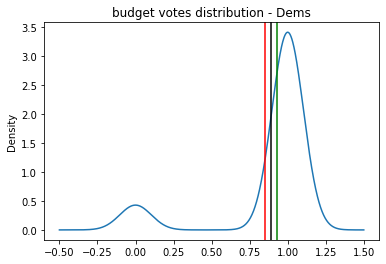

In [37]:
# Assign conf_int function above to variable CI

CI = conf_int(ds)

# Plot out the CIs

ds.plot.density()
plt.title('budget votes distribution - Dems')
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[0], color='black')
plt.axvline(x=CI[2], color='green')
plt.show()

## 3. Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
"""
We can say that the probability that a democrat voted FOR the 'budget' issue
in the 98th Congress, 2nd session 1984 is .88 plus or minus .03

I would also say that the upper and lower bounds appear pretty tight to the mean

"""

## 4. Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data

*   By Hand using Numpy
*   In a single line using Scipy


In [185]:
# Import the 'housing' data from DS 112 Lecture


housing = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv',
                    )
print(housing.shape)
#housing.head()

(1460, 81)


In [186]:
housing = housing.dropna(axis=1)
print(housing.shape)
#housing.tail()

(1460, 62)


In [78]:
housing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [79]:
housing['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [80]:
housing['OverallQual'].value_counts()

# Selected two variables

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [104]:
# Put the two variables into a crosstab for visual
of = pd.crosstab(housing['OverallQual'], housing['SaleCondition'], margins=True)

# Enable margins to view totals for use below

of

OverallQual,1,2,3,4,5,6,7,8,9,10,All
SaleCondition,,,,,,,,,,,
Abnorml,0,1,3,13,37,27,10,8,1,1,101
AdjLand,0,0,0,1,2,1,0,0,0,0,4
Alloca,0,0,0,2,6,2,1,1,0,0,12
Family,0,0,1,1,7,4,6,1,0,0,20
Normal,2,2,16,98,341,328,256,120,25,10,1198
Partial,0,0,0,1,4,12,46,38,17,7,125
All,2,3,20,116,397,374,319,168,43,18,1460


In [171]:
# BY HAND WITH NUMPY:

# Put the two variables into a crosstab
observed = pd.crosstab(housing['OverallQual'], housing['SaleCondition'])

# Turn the crosstab into numpy array
observed = observed.values

# Transpose to match style above
observed = observed.T

observed

array([[  0,   1,   3,  13,  37,  27,  10,   8,   1,   1],
       [  0,   0,   0,   1,   2,   1,   0,   0,   0,   0],
       [  0,   0,   0,   2,   6,   2,   1,   1,   0,   0],
       [  0,   0,   1,   1,   7,   4,   6,   1,   0,   0],
       [  2,   2,  16,  98, 341, 328, 256, 120,  25,  10],
       [  0,   0,   0,   1,   4,  12,  46,  38,  17,   7]])

In [0]:
# Calculate the Expected Value

# Set row and column totals
row_sums = [101,4,12,20,1198,125] # I need some more practice with iloc! 
# Turn into array
row_sums = pd.Series(row_sums)
row_sums = row_sums.values
#row_sums = row_sums.T
# Same for cols
col_sums = [2,3,20,116,397,374,319,168,43,18]
col_sums = pd.Series(col_sums)
col_sums = col_sums.values

# Define sample size
total_obs = housing.shape[0]

In [173]:
# Define the function for ev calculation

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_obs
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(6, 10)
[[1.38356164e-01 2.07534247e-01 1.38356164e+00 8.02465753e+00
  2.74636986e+01 2.58726027e+01 2.20678082e+01 1.16219178e+01
  2.97465753e+00 1.24520548e+00]
 [5.47945205e-03 8.21917808e-03 5.47945205e-02 3.17808219e-01
  1.08767123e+00 1.02465753e+00 8.73972603e-01 4.60273973e-01
  1.17808219e-01 4.93150685e-02]
 [1.64383562e-02 2.46575342e-02 1.64383562e-01 9.53424658e-01
  3.26301370e+00 3.07397260e+00 2.62191781e+00 1.38082192e+00
  3.53424658e-01 1.47945205e-01]
 [2.73972603e-02 4.10958904e-02 2.73972603e-01 1.58904110e+00
  5.43835616e+00 5.12328767e+00 4.36986301e+00 2.30136986e+00
  5.89041096e-01 2.46575342e-01]
 [1.64109589e+00 2.46164384e+00 1.64109589e+01 9.51835616e+01
  3.25757534e+02 3.06884932e+02 2.61754795e+02 1.37852055e+02
  3.52835616e+01 1.47698630e+01]
 [1.71232877e-01 2.56849315e-01 1.71232877e+00 9.93150685e+00
  3.39897260e+01 3.20205479e+01 2.73116438e+01 1.43835616e+01
  3.68150685e+00 1.54109589e+00]]


In [176]:
# Now that I have both observed and expected, I can run the chi^2 test

chi2 = ((observed-expected)**2 / expected).sum()
chi2

212.73921270126914

In [184]:
# SINGLE LINE WITH SCIPY:

chi2, p_value, dof, ex = stats.chi2_contingency(observed)

print(chi2)
print(p_value)
print(dof)

212.73921270126914
1.2605606457467838e-23
45


In [0]:
'''
Null hypothesis: The two variables are independent, no relationship

Alternate: The two variables are dependent, have relationship

Confidence Level: 95%

Conclusion: Due to chi^2 value of 212.73 and p-value ~0, I reject the null 
hypothesis and suggest the alternative that overallquality has some relationship
to salecondition
'''

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)